<a href="https://colab.research.google.com/github/220599/CreditCard-FraudDetection/blob/main/Credit_Card_Fraud_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libararies

`````

In [183]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
#Loading Data to Pandas data frame
credit_card_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [186]:
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [187]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [188]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [189]:
#Checking for missing values in coloumn
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [190]:
  #distribution of legit transactions & fraudulent transactions
  credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [191]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

<ipython-input-192-4083db23f128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=credit_card_data, palette='Set2')


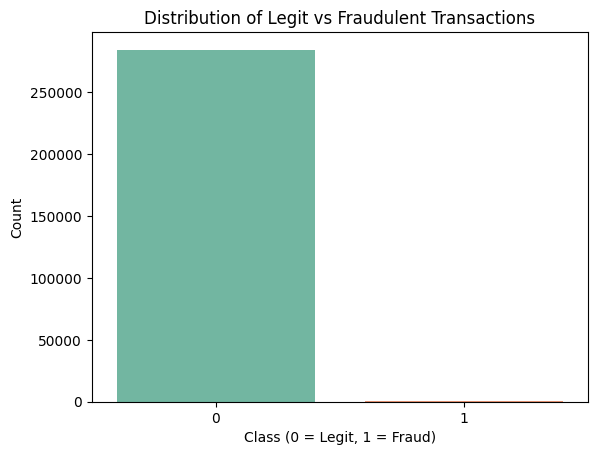

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=credit_card_data, palette='Set2')
plt.title('Distribution of Legit vs Fraudulent Transactions')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [193]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [217]:
#statistical measure of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [195]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [196]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Sampling

build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

number of fraudulent transactions -->492


In [197]:
legit_sample=legit.sample(n=492)

In [198]:
#concatenating two DataFrames
new_dataset=pd.concat([legit_sample, fraud], axis=0)

In [199]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
137301,82101.0,1.152732,0.037310,1.302303,1.332648,-0.892978,-0.173755,-0.493829,0.036372,0.745452,...,-0.051263,0.104572,-0.016996,0.416968,0.448159,-0.412228,0.078669,0.040472,9.99,0
256865,157897.0,0.084623,0.049734,0.235022,-2.574383,0.689250,-0.873735,0.835463,-0.355359,1.270806,...,0.009803,0.290248,-0.185970,0.500471,-0.049906,-0.328567,-0.108170,-0.169769,10.47,0
102436,68205.0,-2.534525,2.495801,-0.823814,0.995289,-0.621968,1.020340,-1.193939,2.212104,-1.413890,...,0.240196,0.105732,-0.186192,-1.294137,0.377810,-0.168923,-1.005952,-0.249585,15.27,0
29107,35325.0,-0.604480,0.837747,0.854883,-0.030293,0.760168,-0.097941,1.275224,0.096818,-0.944181,...,-0.122065,-0.601124,0.129078,-0.399966,-0.320173,-0.831323,0.097349,0.136642,69.94,0
64128,51036.0,-0.916961,0.425531,0.997840,2.509192,-2.448592,1.815718,2.896488,-0.176264,-1.125998,...,-0.138645,-0.308437,0.465299,0.297133,-0.554269,-0.203192,0.261518,0.010484,604.72,0


In [201]:
new_dataset.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [202]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94372.953252,-0.192772,-0.055107,0.077753,0.033559,-0.005033,0.095680,0.039998,0.038931,-0.054290,...,0.041584,0.057826,-0.061203,0.001457,0.01882,-0.032190,0.000661,-0.013503,0.016248,113.267337
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [203]:
#splitiing dataset to features and traget
X=new_dataset.drop(columns='Class', axis = 1)
Y=new_dataset['Class']

In [204]:
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
137301   82101.0  1.152732  0.037310  1.302303  1.332648 -0.892978 -0.173755   
256865  157897.0  0.084623  0.049734  0.235022 -2.574383  0.689250 -0.873735   
102436   68205.0 -2.534525  2.495801 -0.823814  0.995289 -0.621968  1.020340   
29107    35325.0 -0.604480  0.837747  0.854883 -0.030293  0.760168 -0.097941   
64128    51036.0 -0.916961  0.425531  0.997840  2.509192 -2.448592  1.815718   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [205]:
#Split dtat into training and testing data
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [206]:
print(X.shape,X_test.shape, X_train.shape)

(984, 30) (197, 30) (787, 30)


In [207]:
#model training
model = LogisticRegression()

In [208]:
#Training model
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [209]:
# model evalution Accuracy score
X_train_prediction = model.predict(X_train)
training_data_aacuracy= accuracy_score(X_train_prediction, Y_train)

In [210]:
import time

start_time = time.time()
model.predict(X_test)
end_time = time.time()

print("Prediction latency:", end_time - start_time, "seconds")


Prediction latency: 0.015702009201049805 seconds


In [211]:
print('Accuracy on training data:', training_data_aacuracy)

Accuracy on training data: 0.9453621346886912


In [212]:
X_test_prediction = model.predict(X_test)
test_data_aacuracy= accuracy_score(X_test_prediction, Y_test)

In [213]:
print('Accuracy on testing data:', test_data_aacuracy)

Accuracy on testing data: 0.9441624365482234


In [214]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

print(classification_report(Y_test, X_test_prediction))
print("ROC-AUC Score:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95        99
           1       0.99      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197

ROC-AUC Score: 0.9846423417851989


 Visualizing ROC curve


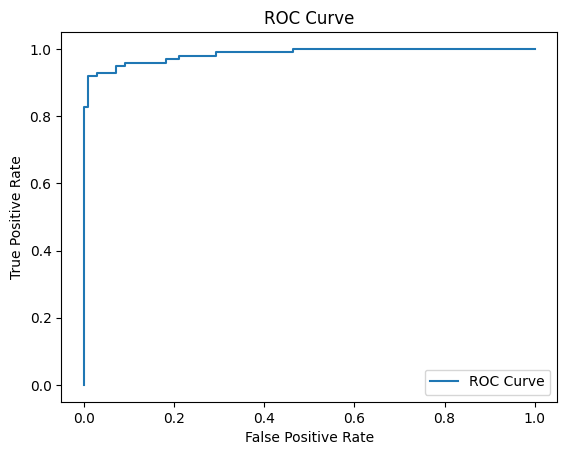

In [215]:

fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
